In [1]:
# !pip3 install --break-system-packages requests obspy
# !pip3 install --break-system-packages pyzt
# !pip3 install --break-system-packages ipywidgets
# Install required packages if needed
# !pip3 install requests obspy pyzt ipywidgets


Current UTC time: 2025-08-15 16:44:33
Current Alaska time: 2025-08-15 08:44:33
✅ Downloaded and saved file: mseed_files/Spurr_Last_1d_2025-08-15_T_084433.mseed
📊 Original Data Sampling Rate: 50.0 Hz
✅ Saved plot file: Plot_Files/Spurr_Last_1d_2025-08-15_T_084433.png
✅ Saved audio file: Audio_Files/Spurr_Last_1d_2025-08-15_T_084433.wav
Marker file time range: 2025-08-14 08:44:33 to 2025-08-14 11:01:28 Alaska time
✅ Generated marker file: Audio_Files/Spurr_Last_1d_2025-08-15_T_084433_Marker_File.txt with Alaska time markers
Created 4 markers from 08:44 AM to 11:01 AM

== Processing Summary ==
MSEED file: mseed_files/Spurr_Last_1d_2025-08-15_T_084433.mseed
Audio file: Audio_Files/Spurr_Last_1d_2025-08-15_T_084433.wav
Marker file: Audio_Files/Spurr_Last_1d_2025-08-15_T_084433_Marker_File.txt
Plot file: Plot_Files/Spurr_Last_1d_2025-08-15_T_084433.png


Button(description='Open Directory', style=ButtonStyle())

Button(description='Open Audio in RX 11', style=ButtonStyle())

Button(description='Open Marker File', style=ButtonStyle())

Button(description='Open Plot Image', style=ButtonStyle())

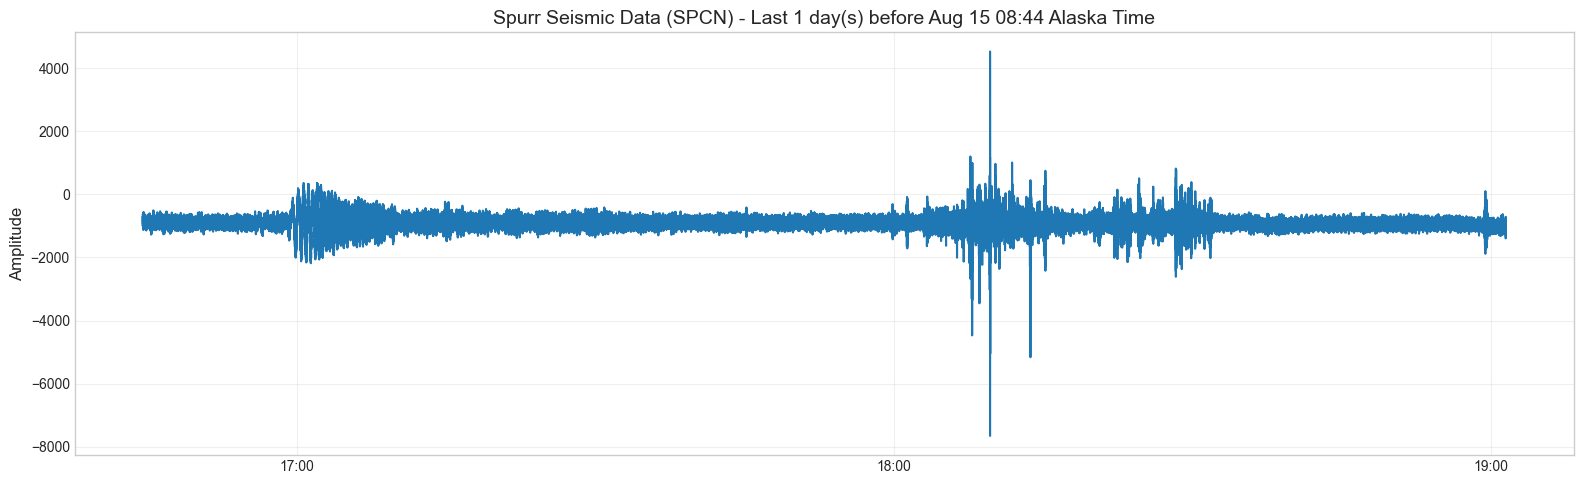

In [1]:
# Import the print manager
from python_code.print_manager import print_manager

# Import required modules
from python_code.main import main
import os
import ipywidgets as widgets
from IPython.display import display
import subprocess
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt

# Print current time
# print(f"Current UTC time: {datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')}")

# Current time
utc_now = datetime.now(timezone.utc)
ak_offset = timedelta(hours=-8)
alaska_time = utc_now + ak_offset

# print(f"Current UTC time: {utc_now.strftime('%Y-%m-%d %H:%M:%S')}")
# print(f"Current Alaska time: {alaska_time.strftime('%Y-%m-%d %H:%M:%S')}")

# Configuration parameters
config = {
    "days": 1,                      # Number of days to process
    "sampling_rate": 75000,            # Audio sampling rate in Hz
    "tick_interval_hours": 1,         # X-axis tick interval for plot
    "marker_interval_hours": 1,       # Interval for audio markers
    "use_am_pm": True,                # Use AM/PM format in marker file
    "markers_in_AKST": True,          # Use Alaska time for markers
    "interpolate_missing_data": False # If True, interpolate missing data; if False, fill with zeros
}

# Configure print options
print_manager.show_times = True          # Time-related messages
print_manager.show_files = True         # File operation messages
print_manager.show_buttons = True        # UI buttons
print_manager.show_marker_summary = True # Marker summaries
print_manager.show_plots = False           # Plot information
print_manager.show_data_info = False     # Data details (hidden by default)
print_manager.show_api_requests = False  # API details (hidden by default)
print_manager.show_all_markers = False   # All markers detail (hidden by default)
print_manager.show_status = False         # Important status messages

# Run the main function with our config
result = main(**config)


In [3]:
# import requests
# from datetime import datetime, timedelta, timezone
# from obspy import read
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import os
# from scipy.io import wavfile
# import matplotlib.dates as mdates
# import os
# import ipywidgets as widgets
# from IPython.display import display
# import sys
# import subprocess

# # Specify the number of days to look back from current time
# days = .25  # Change this value to the desired number of days
# tick_interval_hours = 1  # Define the tick interval for plot
# # Function to compute time window based on number of days
# def compute_time_window(days):
#     # 1. Get current UTC time (this is the most reliable starting point)
#     utc_now = datetime.now(timezone.utc)
#     print(f"Current UTC time: {utc_now.strftime('%Y-%m-%d %H:%M:%S')}")
    
#     # 2. Calculate end time by simply using UTC time (no conversion needed)
#     end_time_utc = utc_now
    
#     # 3. Calculate start time by going back specified number of days
#     start_time_utc = end_time_utc - timedelta(days=days)
    
#     # 4. Format UTC times for the IRIS API
#     end_str = end_time_utc.strftime("%Y-%m-%dT%H:%M:%S")
#     start_str = start_time_utc.strftime("%Y-%m-%dT%H:%M:%S")
    
#     # 5. For display purposes, convert to Alaska time
#     # Alaska is UTC-9 standard or UTC-8 during daylight savings
#     ak_offset = timedelta(hours=-8)  # Currently in daylight saving
#     alaska_time = utc_now + ak_offset
    
#     print(f"Current Alaska time: {alaska_time.strftime('%Y-%m-%d %H:%M:%S')}")
#     print(f"Requesting data from {start_time_utc.strftime('%Y-%m-%d %H:%M:%S')} to {end_time_utc.strftime('%Y-%m-%d %H:%M:%S')} UTC")
    
#     # 6. Return the UTC time strings for API and Alaska time for display
#     return start_str, end_str, alaska_time


# # Step 1: Compute time window
# start_str, end_str, end_time = compute_time_window(days)

# # Create directories if they don't exist
# mseed_dir = "mseed_files"
# audio_marker_dir = "Audio_Files"
# plot_dir = "Plot_Files"
# os.makedirs(mseed_dir, exist_ok=True)
# os.makedirs(audio_marker_dir, exist_ok=True)
# os.makedirs(plot_dir, exist_ok=True)

# # Create filenames with the new format
# formatted_time = end_time.strftime('%Y-%m-%d_T_%H%M%S')
# filename = os.path.join(mseed_dir, f"Spurr_Last_{days}d_{formatted_time}.mseed")
# audio_filename = os.path.join(audio_marker_dir, f"Spurr_Last_{days}d_{formatted_time}.wav")
# marker_filename = os.path.join(audio_marker_dir, f"Spurr_Last_{days}d_{formatted_time}_Marker_File.txt")
# plot_filename = os.path.join(plot_dir, f"Spurr_Last_{days}d_{formatted_time}.png")

# # Step 2: Check if file exists locally or fetch MiniSEED data
# if os.path.exists(filename):
#     print(f"✅ Using existing file: {filename}")
#     st = read(filename)
# else:
#     url = "https://service.iris.edu/fdsnws/dataselect/1/query"
#     params = {
#         "net": "AV",
#         "sta": "SPCN",
#         "loc": "--",
#         "cha": "BHZ",
#         "start": start_str,
#         "end": end_str,
#         "format": "miniseed",
#         "nodata": 404
#     }
#     response = requests.get(url, params=params)

#     # Step 3: Save if successful
#     if response.status_code == 200:
#         with open(filename, "wb") as f:
#             f.write(response.content)
#         print(f"✅ Downloaded and saved file: {filename}")
#         st = read(filename)
#     else:
#         print(f"❌ Error {response.status_code}: No data found or request failed.")
#         exit()

# # Step 4: Plot waveform - Direct matplotlib approach
# print(f"Stream contains {len(st)} traces")
# print(f"Data points in first trace: {len(st[0].data)}")
# print(f"Min/Max values: {st[0].data.min()}, {st[0].data.max()}")



# # Set global font size configurations
# mpl.rcParams.update({
#     'font.size': 12,           # Base font size
#     'axes.titlesize': 16,      # Title font size
#     'axes.labelsize': 14,      # Axis label font size
#     'xtick.labelsize': 12,     # X-axis tick label size
#     'ytick.labelsize': 12,     # Y-axis tick label size
#     'legend.fontsize': 12,     # Legend font size
#     'figure.titlesize': 18     # Figure title size
# })


# # Create a direct matplotlib plot
# plt.figure(figsize=(16, 5))

# # Get the time array for x-axis
# tr = st[0]
# times = tr.times("matplotlib")  # Convert to matplotlib date format
# amplitude = tr.data

# # Plot the data directly
# plt.plot(times, amplitude)

# # Format x-axis
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=tick_interval_hours))

# # Format the end time for the title (using Alaska time)
# formatted_end_time = end_time.strftime('%b %d %H:%M')  # end_time is already in Alaska time

# # Add labels and title with date information
# plt.title(f"Spurr Seismic Data (SPCN) - Last {days} day(s) before {formatted_end_time} Alaska Time")
# plt.ylabel("Amplitude")
# plt.grid(True, alpha=0.3)

# # Make sure everything fits
# plt.tight_layout()

# # Save and show
# plt.savefig(plot_filename)
# plt.show()
# print(f"✅ Saved plot file: {plot_filename}")

# # Step 5: Create audio file
# # First normalize and prepare the data
# tr = st[0].copy()
# tr.detrend('demean')  # Remove mean
# tr.taper(max_percentage=0.0001)  # Apply taper to reduce edge effects


# # ⚙️ Configuration Settings ⚙️
# #------------------------------------------------------------------------------//⚙️
# # 🔊 Audio settings
# tr.stats.sampling_rate = 7500  # Set the sampling rate
# # tr.stats.sampling_rate = 75000  # Alternative higher sampling rate
# # tr.stats.sampling_rate = 500000  # Alternative higher sampling rate


# # 📈 Plot settings

# marker_interval_hours = 1  # Set the interval for markers in hours


# #------------------------------------------------------------------------------//⚙️


# # Normalize amplitude to range [-1, 1] for audio
# data = tr.data.astype(float)
# max_amp = max(abs(data))
# if max_amp > 0:  # Avoid division by zero
#     data = data / max_amp

# # Convert to 16-bit PCM
# audio_data = (data * 32767).astype('int16')

# # Save as WAV file
# wavfile.write(audio_filename, int(tr.stats.sampling_rate), audio_data)
# print(f"✅ Saved audio file: {audio_filename}")

# # Function to generate marker file with timestamps aligned to day boundaries
# def generate_marker_file_with_data_timestamps(stream, marker_interval_hours, filename, use_am_pm=True):
#     with open(filename, "w") as f:
#         f.write("Marker file version: 1\n")
#         f.write("Time format: Samples\n")
        
#         # Extract the start and end times from the stream (these are in UTC)
#         obspy_start_time = stream[0].stats.starttime
#         obspy_end_time = stream[0].stats.endtime
        
#         # Convert to standard Python datetime objects (still in UTC)
#         start_time_utc = datetime(
#             obspy_start_time.year, obspy_start_time.month, obspy_start_time.day,
#             obspy_start_time.hour, obspy_start_time.minute, obspy_start_time.second,
#             obspy_start_time.microsecond, tzinfo=timezone.utc
#         )
        
#         end_time_utc = datetime(
#             obspy_end_time.year, obspy_end_time.month, obspy_end_time.day,
#             obspy_end_time.hour, obspy_end_time.minute, obspy_end_time.second,
#             obspy_end_time.microsecond, tzinfo=timezone.utc
#         )
        
#         # Apply Alaska timezone offset (-8 hours during DST)
#         ak_offset = timedelta(hours=-8)  # Use -9 during standard time
#         start_time = start_time_utc + ak_offset
#         end_time = end_time_utc + ak_offset
        
#         print(f"Marker file time range: {start_time.strftime('%Y-%m-%d %H:%M:%S')} to {end_time.strftime('%Y-%m-%d %H:%M:%S')} Alaska time")
        
#         sampling_rate = stream[0].stats.sampling_rate
        
#         # Find the "anchor points" that align with day boundaries
#         # First, get the most recent anchor time before the start time
#         anchor_time = start_time.replace(hour=0, minute=0, second=0, microsecond=0)
        
#         # Now find the first anchor time that occurs at or after start_time
#         current_time = anchor_time
#         while current_time < start_time:
#             current_time += timedelta(hours=marker_interval_hours)
#             # If we pass into a new day, make sure we reset to hour intervals from midnight
#             if current_time.hour < (current_time - timedelta(hours=marker_interval_hours)).hour:
#                 # We crossed midnight - align to midnight + interval pattern
#                 current_time = current_time.replace(hour=0, minute=0, second=0, microsecond=0)
#                 # Then advance by intervals until we're beyond start_time
#                 while current_time < start_time:
#                     current_time += timedelta(hours=marker_interval_hours)
        
#         # Now we have the first valid marker time after start_time
#         # Write markers at the specified interval
#         while current_time <= end_time:
#             hour = current_time.hour
#             if use_am_pm:
#                 formatted_time = current_time.strftime(f'%m/%d %I:%M %p')
#             else:
#                 formatted_time = current_time.strftime(f'%m/%d %H:%M')
            
#             # Calculate sample position - use the UTC times for consistent calculation
#             # Convert current_time back to UTC for comparison with start_time_utc
#             current_time_utc = current_time - ak_offset
#             seconds_from_start = (current_time_utc - start_time_utc).total_seconds()
#             current_sample = int(seconds_from_start * sampling_rate)
            
#             # Only write the marker if it falls within the data range
#             if 0 <= current_sample <= len(stream[0].data):
#                 f.write(f"{formatted_time}\t{current_sample}\n")
            
#             # Move to next marker time
#             current_time += timedelta(hours=marker_interval_hours)
            
#             # If we cross over to a new day, realign to the proper hour pattern
#             if current_time.hour < (current_time - timedelta(hours=marker_interval_hours)).hour:
#                 # We crossed midnight - align to midnight + interval pattern
#                 current_time = current_time.replace(hour=0, minute=0, second=0, microsecond=0)
        
#         # Write the end marker if it doesn't align with the interval markers
#         end_hour = end_time.hour
#         if use_am_pm:
#             formatted_end_time = end_time.strftime(f'%m/%d %I:%M %p')
#         else:
#             formatted_end_time = end_time.strftime(f'%m/%d %H:%M')
#         end_sample = len(stream[0].data) - 1
        
#         # Only write if the last interval marker isn't already at the end
#         last_marker_time = current_time - timedelta(hours=marker_interval_hours)
#         last_marker_seconds = (last_marker_time - end_time).total_seconds()
#         if abs(last_marker_seconds) > 60:
#             f.write(f"{formatted_end_time}\t{end_sample}\n")


# generate_marker_file_with_data_timestamps(st, marker_interval_hours, marker_filename, use_am_pm=True)
# print(f"✅ Generated marker file: {marker_filename}")

# def open_directory(b):
#     directory = os.path.dirname(os.path.abspath(marker_filename))
#     try:
#         # Mac-specific approach - simple and direct

#         subprocess.run(['open', directory])
#     except Exception as e:
#         print(f"Error opening directory: {e}")

# # Create a simple ipywidgets button
# button = widgets.Button(description="Open Directory")
# button.on_click(open_directory)

# display(button)
# def open_latest_audio_file(b):
#     # Use the directory where the audio file is saved directly
#     directory = os.path.dirname(os.path.abspath(audio_filename))
    
#     try:
#         # Find the most recently created audio file
#         audio_files = [os.path.join(directory, f) for f in os.listdir(directory) 
#                       if f.endswith(('.wav', '.mp3', '.aif', '.aiff', '.flac'))]
        
#         if not audio_files:
#             print(f"No audio files found in {directory}.")
#             return
        
#         # Sort by creation time, newest first
#         latest_audio = max(audio_files, key=os.path.getctime)
        
#         # Open with iZotope RX 11
#         izotope_path = "/Applications/iZotope RX 11 Audio Editor.app/"
#         subprocess.run(['open', '-a', izotope_path, latest_audio])
#         print(f"Opening {os.path.basename(latest_audio)} with iZotope RX 11")
#     except Exception as e:
#         print(f"Error opening latest audio file: {e}")

# # Create a button to open the latest audio file
# open_audio_button = widgets.Button(description="Open Latest Audio in RX 11")
# open_audio_button.on_click(open_latest_audio_file)

# display(open_audio_button)

# # Automatically open the latest audio file in iZotope RX 11 at the end of execution
# try:
#     # Use the directory where the audio file is saved
#     directory = os.path.dirname(os.path.abspath(audio_filename))
    
#     # Find the most recently created audio file
#     audio_files = [os.path.join(directory, f) for f in os.listdir(directory) 
#                   if f.endswith(('.wav', '.mp3', '.aif', '.aiff', '.flac'))]
    
#     if audio_files:
#         # Sort by creation time, newest first
#         latest_audio = max(audio_files, key=os.path.getctime)
        
#         # Open with iZotope RX 11
#         izotope_path = "/Applications/iZotope RX 11 Audio Editor.app/"
#         subprocess.run(['open', '-a', izotope_path, latest_audio])
#         print(f"✅ Automatically opening {os.path.basename(latest_audio)} with iZotope RX 11")
#     else:
#         print(f"No audio files found in {directory}.")
# except Exception as e:
#     print(f"Error automatically opening audio file: {e}")


In [4]:
# # Print summary
# print("\n== Processing Summary ==")
# if print_manager.show_files:
#     print(f"MSEED file: {result['mseed_file']}")
#     print(f"Audio file: {result['audio_file']}")
#     print(f"Marker file: {result['marker_file']}")
#     print(f"Plot file: {result['plot_file']}")
# # print(f"Data points: {result['data_length']:,}")
# # print(f"Time range: {result['time_range']}")

# # Create UI buttons
# def open_marker_file(b):
#     try:
#         subprocess.run(['open', result['marker_file']])
#     except Exception as e:
#         print(f"Error opening marker file: {e}")

# def open_plot_file(b):
#     try:
#         subprocess.run(['open', result['plot_file']])
#     except Exception as e:
#         print(f"Error opening plot file: {e}")

# # Display buttons
# marker_button = widgets.Button(description="Open Marker File")
# marker_button.on_click(open_marker_file)
# plot_button = widgets.Button(description="Open Plot Image")
# plot_button.on_click(open_plot_file)
# display(marker_button)
# display(plot_button)

# # Check marker file contents
# marker_file = result['marker_file']
# if os.path.exists(marker_file):
#     with open(marker_file, 'r') as f:
#         marker_content = f.readlines()
#         print(f"\nMarker file contains {len(marker_content)-2} markers")
#         print("First few markers:")
#         for line in marker_content[:5]:
#             print(line.strip())
#         print("...")
#         print("Last few markers:")
#         for line in marker_content[-3:]:
#             print(line.strip())
# else:
#     print("Marker file not found")

# # Note about tests
# print("\nTo run marker alignment tests, execute in terminal:")
# print("python test_marker_alignment.py")